In [1]:
import  os
import  numpy as np
import  numpy.random  as rd
import scipy as sp
from scipy import stats as st

import matplotlib
from matplotlib import font_manager
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rc
import matplotlib.animation as ani
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["patch.force_edgecolor"] = True
#rc('text', usetex=True)
import seaborn as sns
sns.set(style="whitegrid", palette="muted", color_codes=True)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
red = sns.xkcd_rgb["light red"]
green = sns.xkcd_rgb["medium green"]
blue = sns.xkcd_rgb["denim blue"]
%matplotlib inline

In [2]:
import numpy as np
import scipy as sc
from scipy import linalg
from scipy import spatial
import scipy.spatial.distance
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager
import pylab

In [3]:
# データを生成
x = np.random.normal(0, 1, (10000, 3))

mu = np.mean(x, axis=0)
sigma = np.cov(x.T)

# マハラノビス距離を格納
md = np.zeros((10000))

for i, ix in enumerate(x):
    md[i] = np.sqrt(np.dot(np.dot((ix - mu), np.linalg.inv(sigma)), (ix - mu)))

In [4]:
# 閾値を設定
theta = 3
# マハラノビス距離が閾値を超えるものをflag=1とする
flag = []
for i, imd in enumerate(md):
    if imd > theta:
        print(i, x[i])
        flag.append(1)
    else:
        flag.append(0)

# xとflagを結合
data = np.concatenate((x, np.array(flag).reshape(10000, 1)), axis=1)

142 [ 1.75276071  2.31104659 -0.75639025]
187 [-2.91422312  0.10153855 -0.7254818 ]
195 [ 2.10065825 -3.25815897  1.34770734]
213 [ 1.56985569  1.85360074 -1.77076771]
231 [ 0.43339079 -2.70448546  1.75131772]
238 [-2.27252493 -1.33015992 -2.20905056]
239 [ 3.29490493 -1.11467636  1.76187051]
244 [ 1.63114258 -1.75167169  2.23065552]
308 [-0.36936112 -2.27767438 -2.5394401 ]
318 [-0.1870796  -2.34559736  2.25653485]
322 [ 2.90194875  1.25905403  1.90984469]
330 [-0.045522   -2.20276052  2.09831482]
390 [-0.53773624  1.1849227   2.92872314]
413 [-3.46774235  0.3368754   0.31762029]
434 [-1.75585637  0.57072399  2.41486167]
536 [-0.45131369 -3.03366144 -0.48289769]
543 [-1.99562623  0.66286679  3.8894211 ]
574 [ 2.71189004  0.46688674 -2.17849215]
580 [ 1.59039217 -0.09472376 -2.96816989]
586 [ 3.22876142 -1.21715579  0.93369403]
598 [ 1.02975638 -0.24056531  2.91856565]
614 [-2.24381385  0.79723743 -1.90340186]
618 [-2.57162016  1.11452154 -1.29981703]
659 [ 0.36690887  1.19028055  3.29

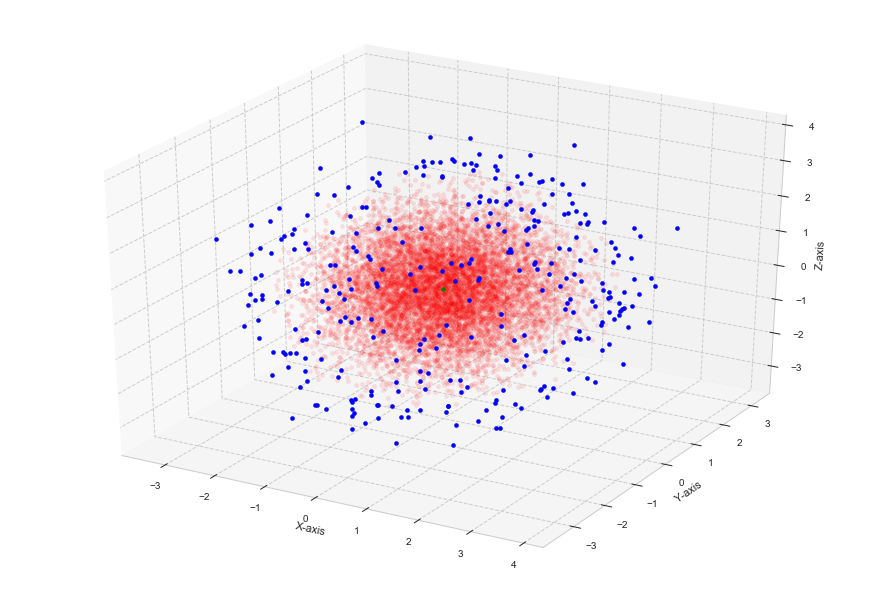

In [5]:
# グラフ作成
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)

# 軸ラベルの設定
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

# 表示範囲の設定
ax.set_xlim(np.min(x[:, 0])-0.1, np.max(x[:, 0])+0.1)
ax.set_ylim(np.min(x[:, 1])-0.1, np.max(x[:, 1])+0.1)
ax.set_zlim(np.min(x[:, 2])-0.1, np.max(x[:, 2])+0.1)

d1 = data[data[:, 3] == 0]
d2 = data[data[:, 3] == 1]
d3 = mu.reshape((1, 3))

# グラフ描画
ax.plot(d1[:, 0], d1[:,1], d1[:,2], "o", color="red", ms=4, mew=0.5, alpha=0.1)
ax.plot(d2[:,0], d2[:,1], d2[:,2], "o", color="blue", ms=4, mew=0.5)
ax.plot(d3[:,0], d3[:,1], d3[:,2], "o", color="green", ms=4, mew=0.5, alpha=1)

plt.show()

In [6]:
import numpy as np

class mahalanobis_distance:
    def __init__(self, x):
        self.mu = np.mean(x, axis=0)
        self.sigma = np.cov(x.T)
        self.sort_index = np.zeros(x.shape[0])
        self.x_md = np.zeros((x.shape[0], x.shape[1]+1))
        self.flag = np.zeros(x.shape[0])
        self.x_flag = np.zeros((x.shape[0], x.shape[1]+1))
        
    def calc_distance(self, x):
        """
        マハラノビス距離の算出
        """
        md = np.zeros((x.shape[0]))
        for i, ix in enumerate(x):
            md[i] = np.sqrt(np.dot(np.dot((ix - self.mu), np.linalg.inv(self.sigma)), (ix - self.mu)))
        
        self.md = md
        
    def sort_distance(self, x):
        """
        マハラノビス距離に基づき並び替える
        """
        self.sort_index = np.argsort(self.md)
        self.x_md = np.concatenate((x, self.sort_index.reshape(x.shape[0], 1)), axis=1)
        self.x_md[:, -1].sort()
    
    def check_outlier(self, theta):
        """
        thetaを基準に外れ値検出を行う
        """
        flag = []
        for i, imd in enumerate(self.md):
            if imd > theta:
                flag.append(1)
            else:
                flag.append(0)
        self.flag = np.array(flag)
        self.x_flag = np.concatenate((x, self.flag.reshape(self.md.shape[0], 1)), axis=1)

In [7]:
md = mahalanobis_distance(x)
md.calc_distance(x)
md.sort_distance(x)
md.check_outlier(2.5)

In [8]:
for i, f in enumerate(md.flag):
    if f:
        print(md.x_md[i])

[ 2.10657847 -1.59056837  0.15206961  0.        ]
[-0.92589496  2.19085115 -0.68794848  2.        ]
[  2.10579731   1.59265458   1.2308852   10.        ]
[ -1.73565396e+00   2.24873860e+00  -1.80635169e-02   2.90000000e+01]
[ -0.70252297  -1.34491019  -2.42250091  35.        ]
[ -1.639314    -2.06255399  -0.99017338  63.        ]
[  2.65177807   0.25973371   0.81553905  66.        ]
[ -1.25797566  -2.50879271  -0.2165395   91.        ]
[  -1.89359807   -0.97526774   -2.07518736  102.        ]
[  -1.39640855   -1.63704463    2.04139429  140.        ]
[   1.75276071    2.31104659   -0.75639025  142.        ]
[  -0.43489327    2.49714059    0.82080697  154.        ]
[   0.77023945   -2.51411169    0.84990423  171.        ]
[ -2.91422312e+00   1.01538549e-01  -7.25481796e-01   1.87000000e+02]
[   1.1255182     2.24131721   -1.23844757  191.        ]
[   2.10065825   -3.25815897    1.34770734  195.        ]
[   1.56985569    1.85360074   -1.77076771  213.        ]
[   0.43339079   -2.704485

[  2.46813418e+00  -2.12687685e+00  -9.90900352e-01   7.37200000e+03]
[ -2.48019928e+00  -1.27784659e+00  -4.07027972e-03   7.37800000e+03]
[ -2.52043813e+00   7.11419594e-01  -8.95798246e-01   7.41200000e+03]
[  3.12515816e-01   2.69704797e+00  -1.36106953e+00   7.42900000e+03]
[  9.23065448e-01  -2.10577184e+00  -1.10365943e+00   7.44300000e+03]
[  1.15866999e+00  -5.06972806e-01  -2.92931600e+00   7.47700000e+03]
[  2.11422712e+00   1.68578019e+00   5.50708116e-01   7.49400000e+03]
[  2.47626714e+00   3.96225731e-01   1.53578993e+00   7.49600000e+03]
[  1.17222271e+00  -2.29589726e+00  -6.24350824e-02   7.50600000e+03]
[  1.34009982e+00  -7.18719092e-01   2.89206315e+00   7.50700000e+03]
[  1.80469243e+00  -1.71681685e+00   2.50348001e-01   7.53100000e+03]
[  2.34915038e+00   4.89708138e-01   8.74774999e-01   7.55500000e+03]
[ -2.08279947e-01   1.24384183e+00   2.44819532e+00   7.56500000e+03]
[ -2.17845597e-01  -2.14528324e+00   1.35665115e+00   7.57200000e+03]
[  2.20395174e+00  -

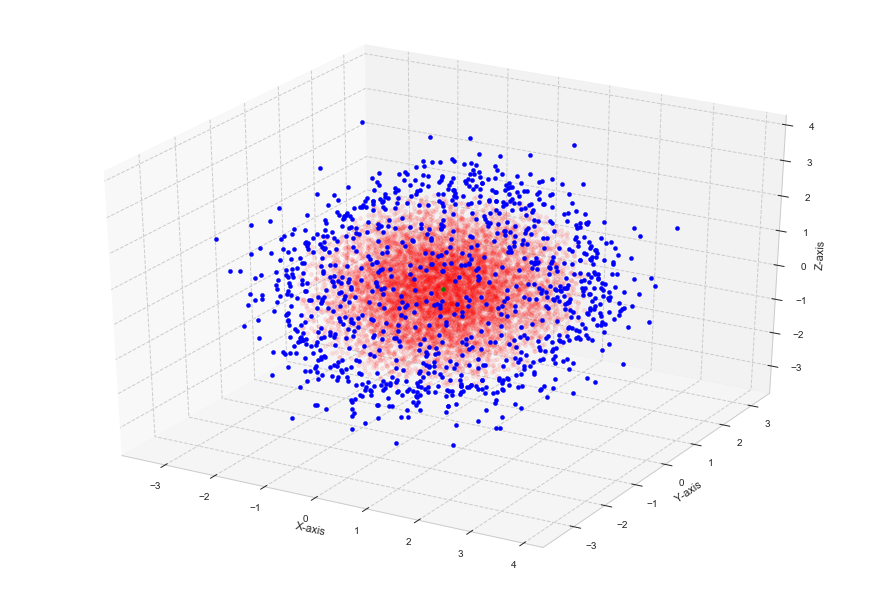

In [9]:
# グラフ作成
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)

# 軸ラベルの設定
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

# 表示範囲の設定
ax.set_xlim(np.min(x[:, 0])-0.1, np.max(x[:, 0])+0.1)
ax.set_ylim(np.min(x[:, 1])-0.1, np.max(x[:, 1])+0.1)
ax.set_zlim(np.min(x[:, 2])-0.1, np.max(x[:, 2])+0.1)

d1 = md.x_flag[md.x_flag[:, 3] == 0]
d2 = md.x_flag[md.x_flag[:, 3] == 1]
d3 = md.mu.reshape((1, 3))

# グラフ描画
ax.plot(d1[:, 0], d1[:,1], d1[:,2], "o", color="red", ms=4, mew=0.5, alpha=0.1)
ax.plot(d2[:,0], d2[:,1], d2[:,2], "o", color="blue", ms=4, mew=0.5)
ax.plot(d3[:,0], d3[:,1], d3[:,2], "o", color="green", ms=4, mew=0.5, alpha=1)

plt.show()